<a href="https://colab.research.google.com/github/kolbeuk/python/blob/master/Glove%20and%20TSNE%20v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

import nltk
from nltk.tokenize import word_tokenize

# For Glove visualisation
from scipy import spatial
from sklearn.manifold import TSNE

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
# import the cleaned test and training data

train = pd.read_csv('DSKtrain.csv')
test = pd.read_csv('DSKtest.csv')

In [32]:
train.info

<bound method DataFrame.info of          id  ...                                              text2
0         1  ...  ['deeds', 'reason', 'earthquake', 'may', 'alla...
1         4  ...  ['forest', 'fire', 'near', 'la', 'ronge', 'sas...
2         5  ...  ['residents', 'asked', 'shelter', 'place', 'no...
3         6  ...  ['13000', 'people', 'receive', 'wildfires', 'e...
4         7  ...  ['got', 'sent', 'photo', 'ruby', 'alaska', 'sm...
...     ...  ...                                                ...
7608  10869  ...  ['two', 'giant', 'cranes', 'holding', 'bridge'...
7609  10870  ...  ['ariaahrary', 'thetawniest', 'control', 'wild...
7610  10871  ...    ['m194', '0104', 'utc5km', 'volcano', 'hawaii']
7611  10872  ...  ['police', 'investigating', 'ebike', 'collided...
7612  10873  ...  ['latest', 'homes', 'razed', 'northern', 'cali...

[7613 rows x 15 columns]>

In [33]:
test.info

<bound method DataFrame.info of          id  ...                                              text2
0         0  ...           ['happened', 'terrible', 'car', 'crash']
1         2  ...  ['heard', 'earthquake', 'different', 'cities',...
2         3  ...  ['forest', 'fire', 'spot', 'pond', 'geese', 'f...
3         9  ...  ['apocalypse', 'lighting', 'spokane', 'wildfir...
4        11  ...  ['typhoon', 'soudelor', 'kills', '28', 'china'...
...     ...  ...                                                ...
3258  10861  ...  ['earthquake', 'safety', 'los', 'angeles', 'uo...
3259  10865  ...  ['storm', 'ri', 'worse', 'last', 'hurricane', ...
3260  10868  ...         ['green', 'line', 'derailment', 'chicago']
3261  10874  ...  ['meg', 'issues', 'hazardous', 'weather', 'out...
3262  10875  ...  ['cityofcalgary', 'activated', 'municipal', 'e...

[3263 rows x 14 columns]>

In [34]:
corpus=[]
for word in tqdm(train['text']):
    words=[word.lower() for word in word_tokenize(word)]
    corpus.append(words)

100%|██████████| 7613/7613 [00:01<00:00, 7521.94it/s]


In [0]:
embeddings_dict = {}
with open("glove.6B.100d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
f.close()

In [0]:
# Examples Using Pre-trained GloVe Vectors in Python
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [0]:
# Examples Using Pre-trained GloVe Vectors in Python
print(find_closest_embeddings(embeddings_dict[house])[1:6])

In [0]:
# Examples Using Pre-trained GloVe Vectors in Python
print(find_closest_embeddings(
    embedding_dict['brick'] - embedding_dict['roof'] + embedding_dict['door'])[:5])

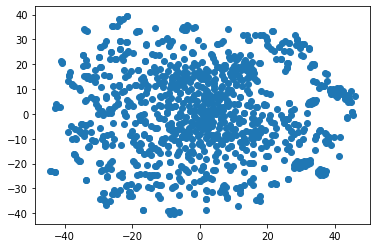

In [26]:
# Examples Using Pre-trained GloVe Vectors in Python
tsne = TSNE(n_components=2, random_state=0)
words =  list(embedding_dict.keys())
vectors = [embedding_dict[word] for word in words]
ytsne = tsne.fit_transform(vectors[:1000])
plt.scatter(ytsne[:, 0], ytsne[:, 1])

In [27]:
for label, x, y in zip(words, ytsne[:, 0], ytsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()